In [1]:
import tensorflow as tf
import tensorflow_hub as hub



In [2]:
import pandas as pd
labels_csv = pd.read_csv("../input/dog-breed-identification/labels.csv")
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [3]:
labels_csv.describe()


,id,breed
count,10222,10222
unique,10222,120
top,37f351d4657a5d7420bb7b146a6672e0,scottish_deerhound
freq,1,126


In [4]:
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
golden_retriever         67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

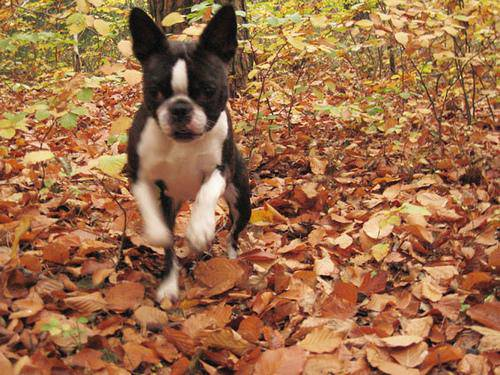

In [5]:
from IPython.display import display, Image
Image("../input/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [6]:
filenames = [ "../input/dog-breed-identification/train/" + code + ".jpg" for code in labels_csv["id"]]

filenames[0:10]

['../input/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '../input/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '../input/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '../input/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '../input/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '../input/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '../input/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '../input/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '../input/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '../input/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [7]:
import numpy as np
labels = labels_csv["breed"].to_numpy() 


In [8]:
df = pd.DataFrame(labels)
  
df.nunique(dropna = True)

0    120
dtype: int64

In [9]:
unique_breeds = np.unique(labels)


In [10]:
print(labels[0])
labels[0] == unique_breeds 


boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [11]:
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:5]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [12]:
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) 
print(boolean_labels[0].astype(int)) 

boston_bull
(array([19]),)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [13]:
X = filenames
y = boolean_labels

print(len(X))
print(len(y))

10222
10222


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y, 
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(8177, 8177, 2045, 2045)

In [15]:
X_train[:5], y_train[:2]

(['../input/dog-breed-identification/train/ad019e394b55406f412b9a03899d5705.jpg',
  '../input/dog-breed-identification/train/c77266278126119fe02a3550dd0c3c1c.jpg',
  '../input/dog-breed-identification/train/ffe5f6d8e2bff356e9482a80a6e29aac.jpg',
  '../input/dog-breed-identification/train/75dbdbf6814e6c72a7cab75c73a5acd7.jpg',
  '../input/dog-breed-identification/train/16fdb4a145a7f5695a264ba980e23bc3.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         Fals

In [16]:
from matplotlib.pyplot import imread
image = imread(filenames[40]) # read in an image
image.shape

(293, 400, 3)

In [17]:
tf.constant(image)[0]

<tf.Tensor: shape=(400, 3), dtype=uint8, numpy=
array([[255, 246, 252],
       [254, 237, 243],
       [253, 237, 240],
       ...,
       [112, 164,  89],
       [ 99, 151,  79],
       [ 94, 146,  74]], dtype=uint8)>

In [18]:
IMG_SIZE = 224

def process_image(image_path):

  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [19]:
# Create a simple function to return a tuple (image, label)
def imagelabel(image_path, label):
 
  image = process_image(image_path)
  return image, label

In [20]:
BATCH_SIZE = 32

def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
 
  if valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), 
                                               tf.constant(y))) 
    data_batch = data.map(imagelabel).batch(BATCH_SIZE)
    return data_batch

  else:
   
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    

    data = data.map(imagelabel)
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [21]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [22]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [23]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

MODEL_URL = "https://tfhub.dev/tensorflow/efficientnet/b0/classification/1"

In [24]:
def createamodel(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):

  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), 
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation="softmax") 
  ])

  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), #evalution criteria
      optimizer=tf.keras.optimizers.SGD(), 
      metrics=["accuracy"] 
)

  model.build(INPUT_SHAPE) 
  
  return model

In [25]:
# model = createamodel()
# model.summary()